In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import mplfinance
from mplfinance.original_flavor import candlestick_ohlc
from matplotlib import style
import numpy as np
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
start_date = "2017-01-01"
end_date = "2017-12-31"

company = 'AAPL'

df = yf.download(company, start_date, end_date)

[*********************100%***********************]  1 of 1 completed


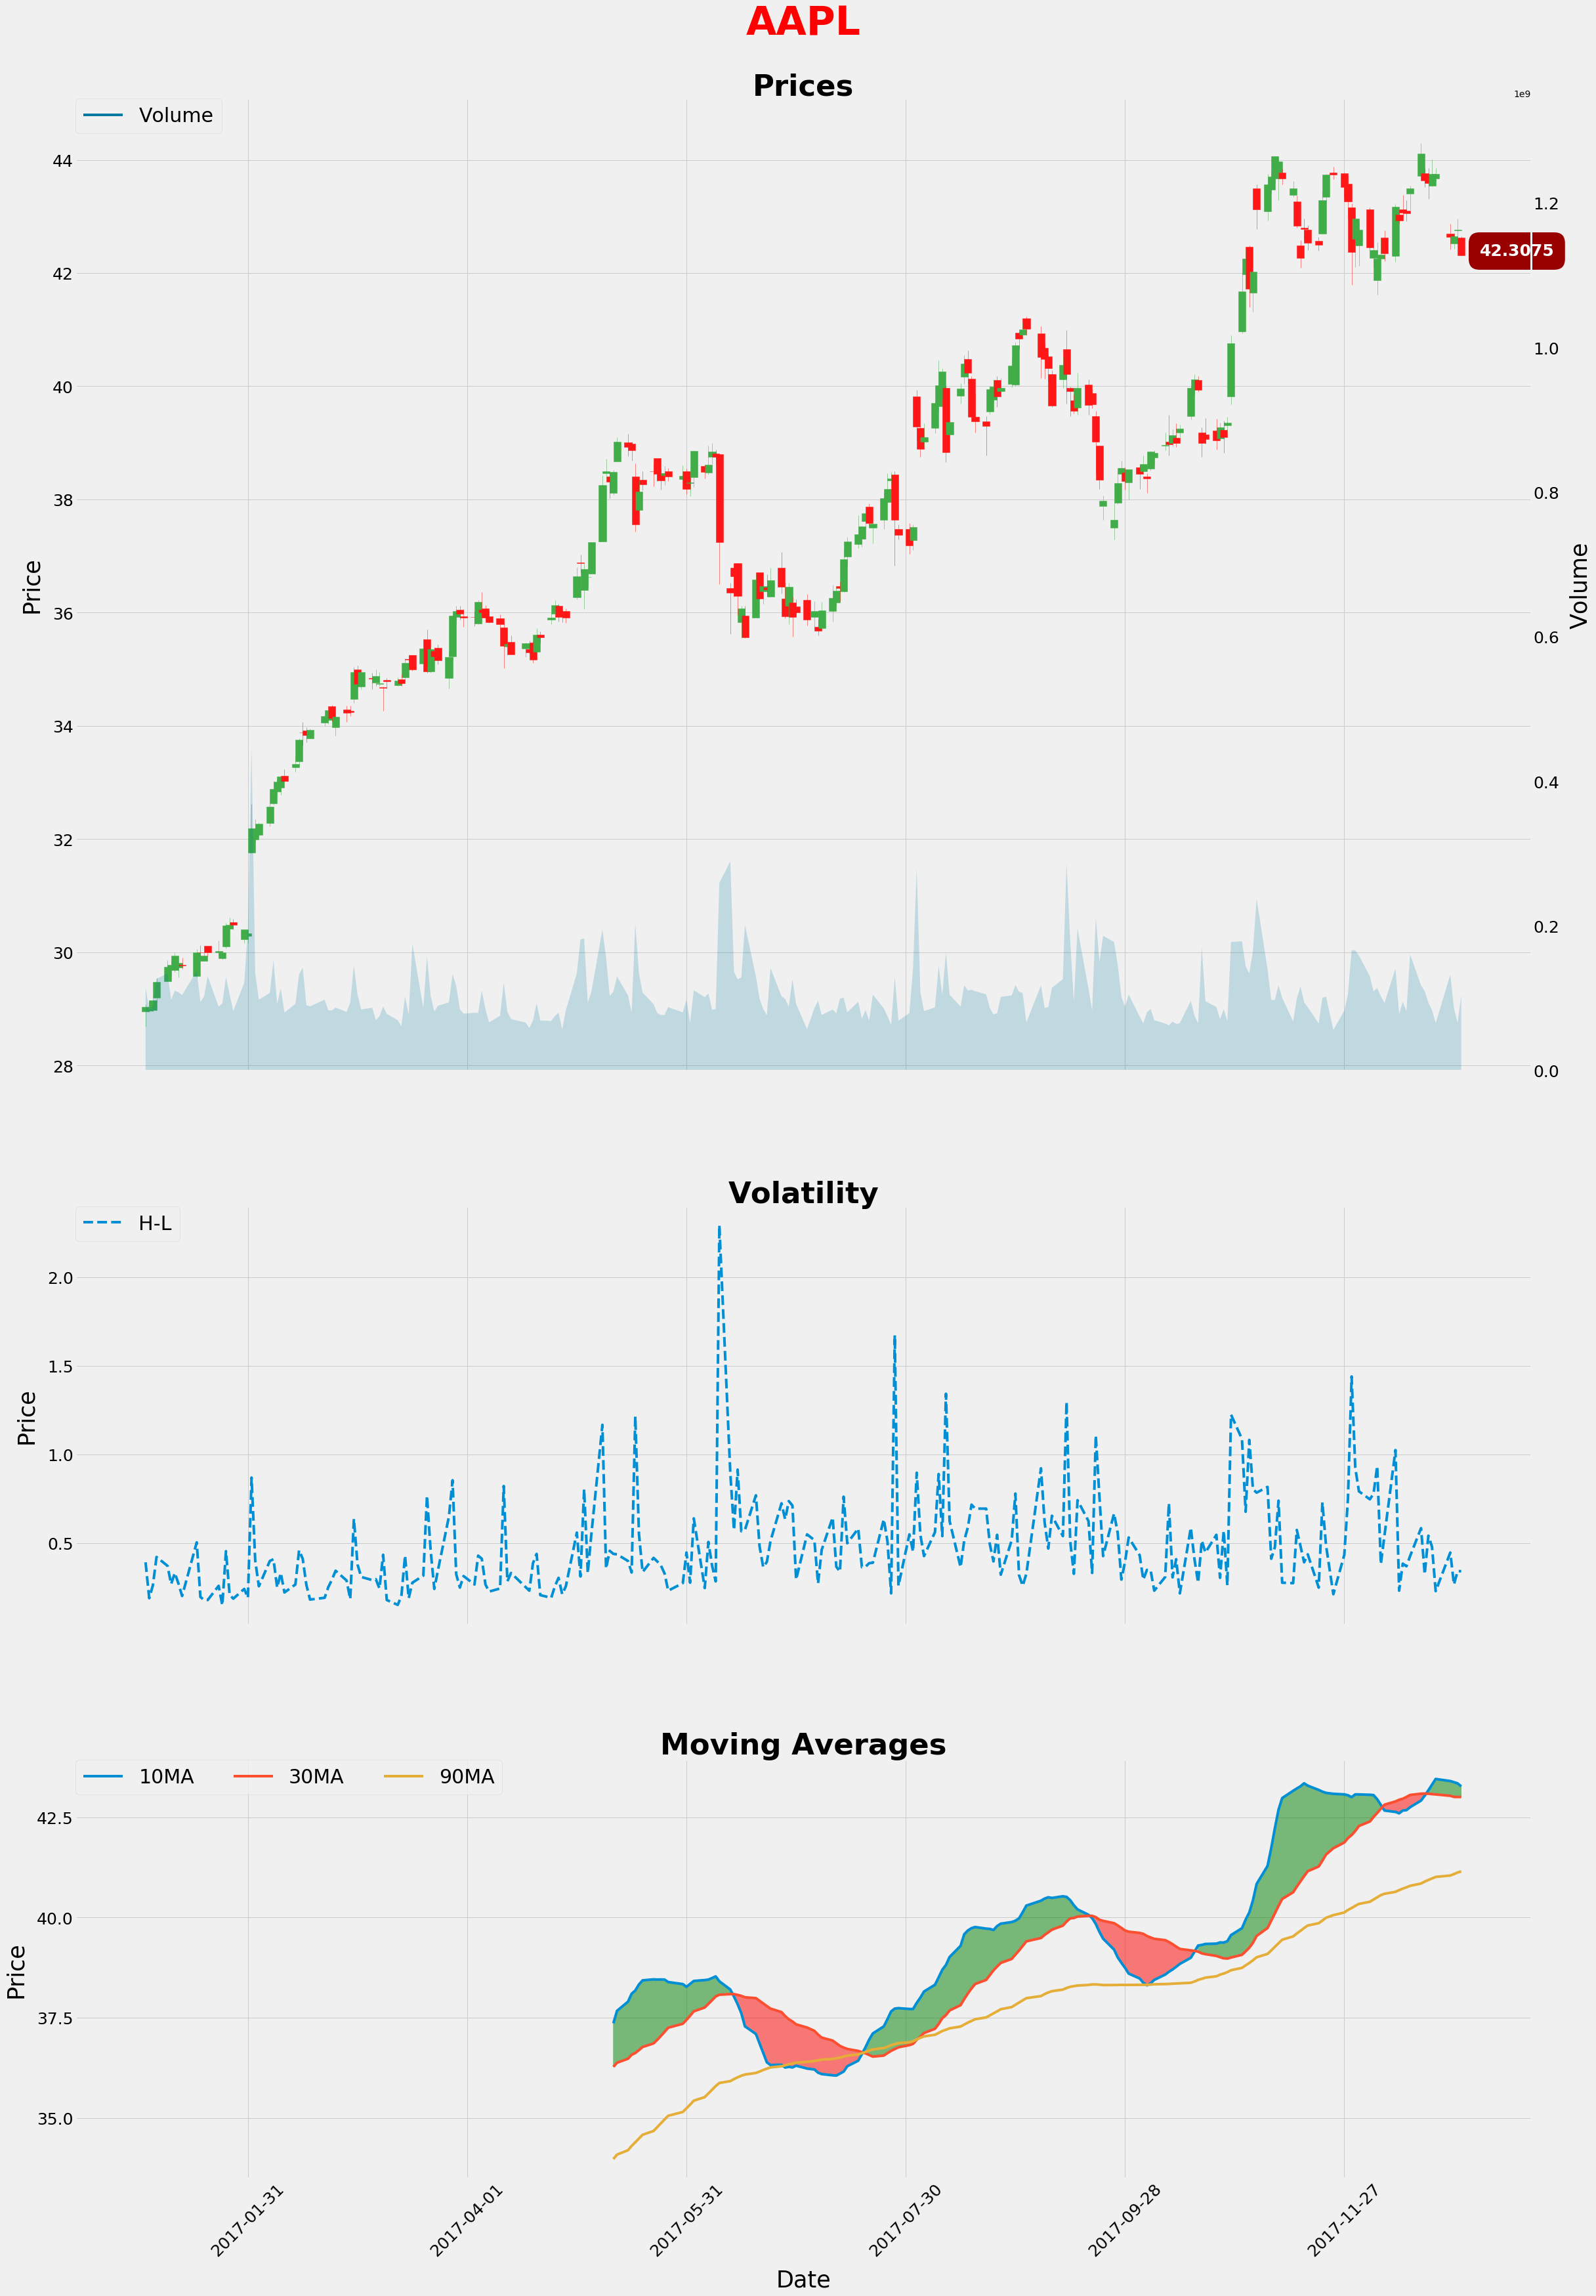

In [3]:
df = df[['Open', 'High', 'Low', 'Close', 'Volume']]
df.reset_index(inplace=True)
df['Date'] = df['Date'].map(mdates.date2num)

style.use('fivethirtyeight')
fig = plt.figure(figsize=(35, 50))
fig.suptitle(company, fontsize=60, fontweight='bold', color='red')

MA1 = 10
MA2 = 30
MA3 = 90

def moving_average(values, window):
    weights = np.repeat(1.0, window) / window
    smas = np.convolve(values, weights, 'valid')
    return smas

def high_minus_low(highs, lows):
    return highs-lows

ma1 = moving_average(df['Close'], MA1)
ma2 = moving_average(df['Close'], MA2)
ma3 = moving_average(df['Close'], MA3)

start = len(df['Date'].iloc[MA3-1:])

ax4 = plt.subplot2grid((8,1), (6, 0), rowspan=2, colspan=1)
ax1 = plt.subplot2grid((8,1), (0, 0), rowspan=4, colspan=1, sharex=ax4)
ax2 = ax1.twinx()
ax3 = plt.subplot2grid((8,1), (4, 0), rowspan=2, colspan=1, sharex=ax4)

ax4.set_xlabel('Date', fontsize=35, labelpad=15)
ax1.set_ylabel('Price', fontsize=35, labelpad=15)
ax2.set_ylabel('Volume', fontsize=35, labelpad=15)
ax3.set_ylabel('Price', fontsize=35, labelpad=15)
ax4.set_ylabel('Price', fontsize=35, labelpad=15)

ax2.set_title('Prices', fontsize=45, color='black', fontweight='bold')
ax3.set_title('Volatility', fontsize=45, color='black', fontweight='bold')
ax4.set_title('Moving Averages', fontsize=45, color='black', fontweight='bold')

candlestick_ohlc(ax1, df.values, width=2, colorup='#41ad49', colordown='#ff1717', alpha=1.0)
ax2.grid(True)

ax4.tick_params(axis ='x', labelsize=25, labelrotation=45, color='g')
ax1.tick_params(axis ='y', labelsize=25, color='g')
ax2.tick_params(axis ='y', labelsize=25, color='g')
ax3.tick_params(axis ='y', labelsize=25, color='g')
ax4.tick_params(axis ='y', labelsize=25, color='g')

ax3.yaxis.set_major_locator(ticker.MaxNLocator(nbins=5, prune='upper'))
ax4.yaxis.set_major_locator(ticker.MaxNLocator(nbins=5, prune='lower'))
ax4.xaxis.set_major_locator(ticker.MaxNLocator(7))
ax4.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

h_l = list(map(high_minus_low, df['High'], df['Low']))
ax3.plot(df['Date'], h_l, '--', linewidth=4, label='H-L')

bbox_props = dict(boxstyle='round, pad=0.7', fc="#990000", ec=None, lw=2)
ax1.annotate(str(round(df['Close'].iloc[-1], 4)), 
                (df['Date'].iloc[-1], df['Close'].iloc[-1]),
                xytext = (df['Date'].iloc[-1]+5, df['Close'].iloc[-1]), 
                fontsize=25, color='white', weight='bold', bbox = bbox_props)

ax2.fill_between(df['Date'], 0, df['Volume'], facecolor='#0079a3', alpha=0.2)
ax2.plot([], [], '-', color='#0079a3', label='Volume', alpha=1.0) 
ax2.grid(False)
ax2.set_ylim(0, 3*df['Volume'].max())

ax4.plot(df['Date'].iloc[-start:], ma1[-start:], linewidth=4, label=str(MA1)+'MA')
ax4.plot(df['Date'].iloc[-start:], ma2[-start:], linewidth=4, label=str(MA2)+'MA')
ax4.plot(df['Date'].iloc[-start:], ma3[-start:], linewidth=4, label=str(MA3)+'MA')

plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)
plt.setp(ax3.get_xticklabels(), visible=False)

ax4.fill_between(df['Date'].iloc[-start:], ma2[-start:], ma1[-start:], where = (ma2[-start:]>=ma1[-start:]), facecolor='r', edgecolor='r', alpha=0.5)
ax4.fill_between(df['Date'].iloc[-start:], ma2[-start:], ma1[-start:], where = (ma2[-start:]<=ma1[-start:]), facecolor='g', edgecolor='g', alpha=0.5)

plt.subplots_adjust(left=.06, bottom=.06, right=.94, top=.94, wspace=.96, hspace=.96)

ax2.legend()
leg = ax2.legend(loc=2, ncol=2, prop={'size':30}, fancybox=True, borderaxespad=0)
leg.get_frame().set_alpha(0.8)

ax3.legend()
leg = ax3.legend(loc=2, ncol=2, prop={'size':30}, fancybox=True, borderaxespad=0)
leg.get_frame().set_alpha(0.8)

ax4.legend()
leg = ax4.legend(loc=2, ncol=3, prop={'size':30}, fancybox=True, borderaxespad=0)
leg.get_frame().set_alpha(0.8)

plt.show()